In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io

# Upload CSV file
uploaded = files.upload()

# Read the uploaded CSV file into a DataFrame
for filename in uploaded.keys():
  df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))
  print(f"Successfully read '{filename}' into DataFrame.")

df.head()

Saving weather.csv to weather.csv
Successfully read 'weather.csv' into DataFrame.


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

Statistics

In [4]:
df.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


Temperature Trend Analysis

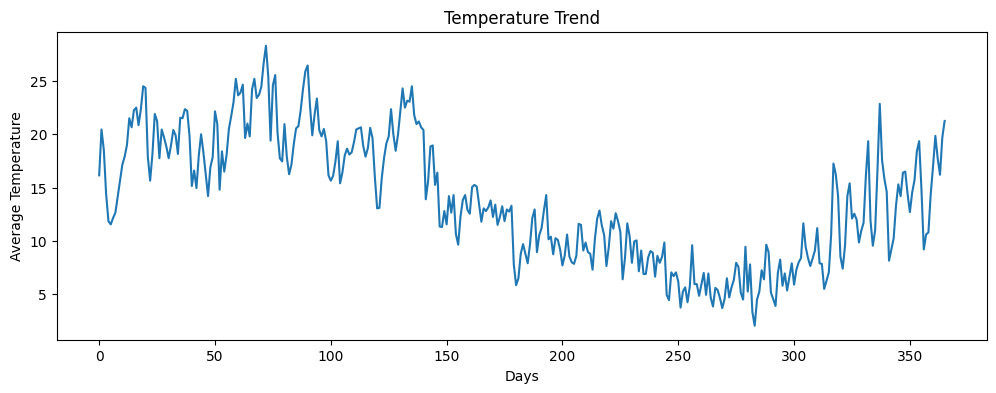

In [5]:
df['AvgTemp'] = (df['MinTemp'] + df['MaxTemp']) / 2

df['AvgTemp'].plot(figsize=(12,4))
plt.title("Temperature Trend")
plt.xlabel("Days")
plt.ylabel("Average Temperature")
plt.show()


Monthly Temperature Pattern

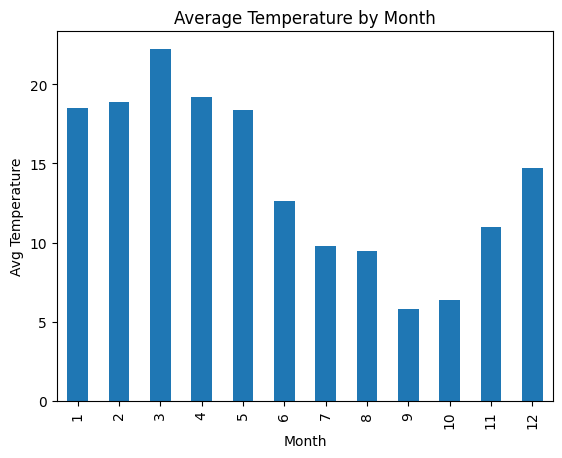

In [7]:
df['Date'] = pd.to_datetime(pd.date_range(start='2023-01-01', periods=len(df)))
df['Month'] = df['Date'].dt.month

monthly_avg = df.groupby('Month')['AvgTemp'].mean()

monthly_avg.plot(kind='bar')
plt.title("Average Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Avg Temperature")
plt.show()

Rainfall Distribution

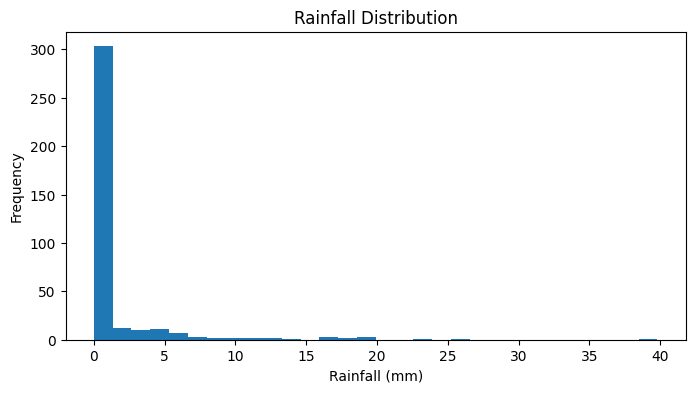

In [8]:
plt.figure(figsize=(8,4))
plt.hist(df['Rainfall'], bins=30)
plt.title("Rainfall Distribution")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()


Seasonal Pattern

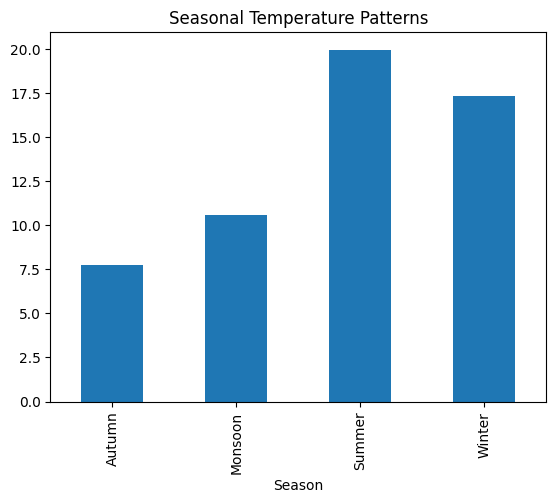

In [9]:
def season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Summer"
    elif month in [6,7,8]:
        return "Monsoon"
    else:
        return "Autumn"

df['Season'] = df['Month'].apply(season)

season_mean = df.groupby('Season')['AvgTemp'].mean()
season_mean.plot(kind='bar')

plt.title("Seasonal Temperature Patterns")
plt.show()


Extreme Weather Events

In [10]:
extreme_temp = df[df['MaxTemp'] > df['MaxTemp'].quantile(0.95)]
extreme_temp.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,AvgTemp,Date,Month,Season
19,15.6,33.4,0.0,8.0,10.4,NE,33.0,NNW,NNW,2.0,...,1,22.8,32.0,No,0.0,No,24.50,2023-01-20,1,Winter
20,15.3,33.4,0.0,8.8,9.5,WNW,59.0,N,NW,2.0,...,5,22.2,32.8,No,0.4,No,24.35,2023-01-21,1,Winter
59,15.4,35.0,0.0,9.6,13.0,E,39.0,SSW,ESE,6.0,...,1,23.4,34.3,No,0.0,No,25.20,2023-03-01,3,Summer
60,13.8,33.5,0.0,11.4,13.6,NE,31.0,SSE,NE,7.0,...,1,21.9,32.2,No,0.0,No,23.65,2023-03-02,3,Summer
61,13.6,34.2,0.0,8.8,12.8,NNE,35.0,ESE,W,2.0,...,6,21.9,31.8,No,0.0,No,23.90,2023-03-03,3,Summer
